# Deep Learning 101

This notebook presents the basic notions that involve the concept of Deep
Learning.

1. **Linear Regression**
2. Logistic Regression
3. Artificial Neural Networks
4. Deep Neural Networks
5. Convolutional Neural Networks

## 1. Linear Regression

Linear regression is a simple machine learning algorithm. This solves a
regression problem. 

* The goal is to build a system that can take a vector $\mathbf{x} \in
  \mathbb{R}^n$ as input and predict the value of a scalar $y \in \mathbb{R}$ as
  its output.
* The output is a linear function of the input.
* We define the output to be $\hat{y}=\mathbf{w}^{\top}\mathbf{x}+\mathbf{b}$
    * $\hat{y}$ is the value that our model predicts
    * $\mathbf{w}$ as a set of weights
    * $\mathbf{b}$ the bias parameter
    
In order **to find the best possible model to describe our data, we need to find
a way to decide how good a model is.**


### Cost function

It's often preferable to use the cost function called **Mean Squared Error**.

$$MSE = \frac{1}{n} \sum_{i} (y_i - \hat{y}_i)^2$$
 
The MSE is preferable because it's smooth and is guaranteed to have a global
minimum.

### Gradient Descent

Gradient descent is an optimization algorithm that refers to the task of either
minimizing or maximizing some function $f (x)$ by altering $x$.

When we are minimizing it, we may also call it the **cost function, loss
function**, or **error function**.

We can thus reduce $f(x)$ by moving $x$ in **small steps** with opposite sign of
the derivative.

$$\nabla f =
    \begin{bmatrix}
        \frac{\partial f}{\partial x_1} \\
        \frac{\partial f}{\partial x_2}
    \end{bmatrix}
$$

### Learning Rate

Positive scalar determining the size of the step.

$$x'=x-\epsilon\nabla_x f(x)$$
* $\epsilon$ this is called **learning rate**

## Linear Regression with Keras and TensorFlow


| **Keras**      | **Example**                                                         | **Link**                 |
| -------------- |:------------------------------------------------------------------: | :-----------------------:|
| **Loss functions**| binary-cross-entropy, categorical-cross-entropy, mean-squared-error | [keras.io/losses/](https://keras.io/losses/)|
| **Optimizers** | SGD, Adam, RMSprop, AdaGrad, AdaDelta | [keras.io/optimizers/](https://keras.io/optimizers/)|

![optimizers gif](img/optimizers.gif)


## 1. Load data

#### Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

np.random.seed(12049)


2023-10-13 14:18:18.938084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 14:18:18.971589: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


#### Getting the data

In [2]:
# read csv function, dataset
df = pd.read_csv('data/weight-height.csv')
# head method shows the first five lines of data frame
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### Explore visual data

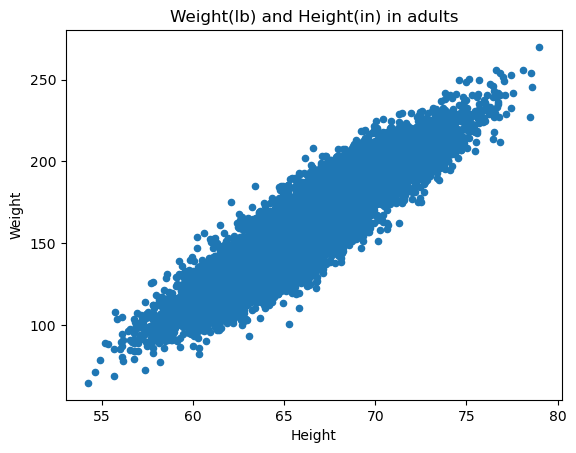

In [3]:
# scatter plot (not order, correlation)
plot = df.plot(
    kind="scatter",
    x="Height",
    y="Weight",
    title="Weight(lb) and Height(in) in adults",
)


In [4]:
# independent variable
X = df[['Height']].values

# dependent variable
y_true = df['Weight'].values


## 2. Define model

In [5]:
# building a linear stack of layers with the sequential model
model = tf.keras.Sequential()

# Add layer
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))


2023-10-13 14:18:19.704934: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-13 14:18:19.719181: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-13 14:18:19.719310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-13 14:18:19.719856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the

#### Model visualization

In [6]:
# plot a Keras model
tf.keras.utils.plot_model(
    model,
    to_file="img/model01_lin_reg.png",
    show_shapes=True,
    show_layer_names=True,
)

# prints a summary representation of your model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


![Linear regression](img/model01_lin_reg.png)

## 3. Compile model

In [7]:
# compiling the sequential model
model.compile(
    tf.keras.optimizers.Adam(learning_rate=0.6),
    loss="mean_squared_error",
    metrics=["mse"],
)


## 4. Fit model

In [8]:
# training the model and saving metrics in history
history = model.fit(X, y_true, epochs=50, verbose=1)


Epoch 1/50
313/313 [==============================] - 0s 709us/step - loss: 927.5759 - mse: 927.5759
Epoch 2/50
313/313 [==============================] - 0s 618us/step - loss: 554.2180 - mse: 554.2180
Epoch 3/50
313/313 [==============================] - 0s 673us/step - loss: 532.0526 - mse: 532.0526
Epoch 4/50
313/313 [==============================] - 0s 597us/step - loss: 497.0309 - mse: 497.0309
Epoch 5/50
313/313 [==============================] - 0s 614us/step - loss: 457.3089 - mse: 457.3089
Epoch 6/50
313/313 [==============================] - 0s 609us/step - loss: 430.6739 - mse: 430.6739
Epoch 7/50
313/313 [==============================] - 0s 639us/step - loss: 378.7910 - mse: 378.7910
Epoch 8/50
313/313 [==============================] - 0s 632us/step - loss: 347.4156 - mse: 347.4156
Epoch 9/50
313/313 [==============================] - 0s 648us/step - loss: 326.6108 - mse: 326.6108
Epoch 10/50
313/313 [==============================] - 0s 625us/step - loss: 298.0714 - mse

## 5. Evaluate model

In [9]:
history.history.keys()


dict_keys(['loss', 'mse'])

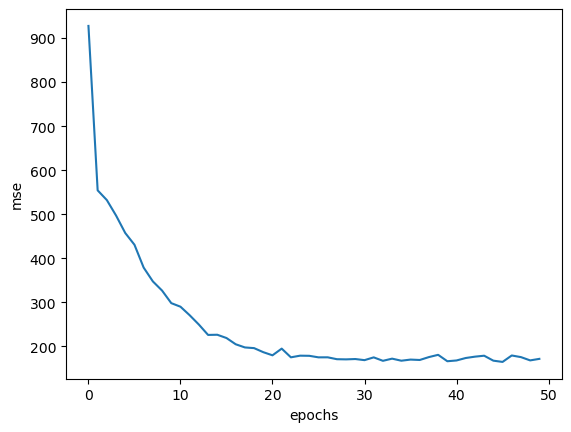

In [10]:
plt.plot(history.history['mse'])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.show()


In [11]:
# evaluate the model performance
score = model.evaluate(X, y_true) 
print('Test score:', score)


313/313 [==============================] - 0s 531us/step - loss: 154.5155 - mse: 154.5155
Test score: [154.5154571533203, 154.5154571533203]


313/313 [==============================] - 0s 318us/step


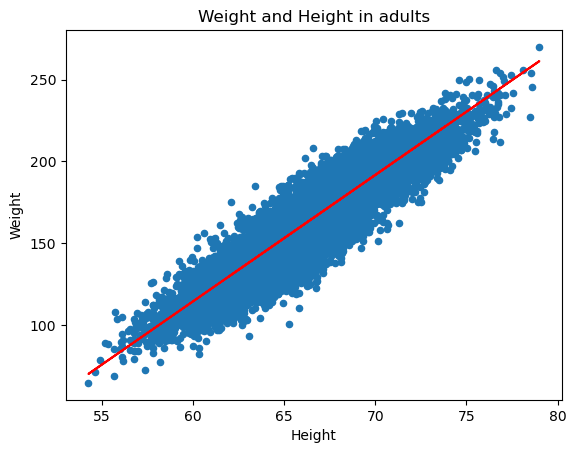

In [12]:
# generate predictions
y_pred = model.predict(X)

df.plot(
    kind="scatter", x="Height", y="Weight", title="Weight and Height in adults"
)
plt.plot(X, y_pred, color="red")
plt.show()


## References

* [Deep Learning Book](http://www.deeplearningbook.org)

* [Zero to Deep Learning™ Udemy Video Course](https://github.com/dataweekends/zero_to_deep_learning_udemy)

* [weight-height.csv](https://www.kaggle.com/mustafaali96/weight-height)